In [1]:
import os
import h5py
import asdf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
L = 2000
N = 1024
cutoff = 1e11

In [3]:
ph = 0
redDir = '/mnt/marvin2/bigsims/AbacusSummit/AbacusSummit_base_c000_ph0' + '{:02d}'.format(ph) + '/halos/z5.000/'

# # Write a message to inform how many particles are kept in each file.
# with open('Data/Frac_Kept.txt', 'a') as per_file:
#     message = fileExt + ': ' + str(perKept) + '\n'
#     per_file.write(message)

# This gets a list of all files with info on the DM haloes.
haloDir = redDir + 'halo_info/'
haloFiles = np.array(os.listdir(haloDir))[np.char.startswith(os.listdir(haloDir), 'h')]

# This is getting the boxsize and particle mass from the first file.
af = asdf.open(haloDir + haloFiles[0])
boxSize = af['header']['BoxSize']
partMass = af['header']['ParticleMassHMsun']

# Get position of haloes and the number of particles in them
N_parts = np.array([])
pos = np.array([[],[],[]]).T
for haloFile in haloFiles:
    af = asdf.open(haloDir + haloFile)
    # Getting the position and number of particles
    pos = np.append(pos, af['data']['x_com'][:], axis = 0)
    N_parts = np.append(N_parts, af['data']['N'][:])

# I'm expecting the position to range from -0.5 to 0.5 in a pretty full manner.
if np.abs((np.max(np.abs(pos))-0.5)/0.5) > 0.01: # Added the second np.abs later, maybe change
    raise Exception('Unexpected positional arguments')

# Cropping to halos within my L, which might be smaller than the boxSize.
sizeCrop = np.where(np.linalg.norm(pos * boxSize, ord = np.inf, axis = 1) <= L/2)[0]
N_parts = N_parts[sizeCrop]
# Getting comoving position instead of a rescaled comoving position.
pos = boxSize * pos[sizeCrop]

# Put galaxies everywhere where there is a halo above the mass cutoff.
gala_pos = pos[np.where(N_parts * partMass >= cutoff)[0]] + L/2

/home/kboone/miniconda3/envs/galbias/lib/python3.12/site-packages/asdf/_compression.py:46: AsdfWarning: Found more than one compressor for "blsc"
  warnings.warn(f'Found more than one compressor for "{label}"', AsdfWarning)


In [4]:
N_parts * partMass

array([1.72944685e+11, 7.80360163e+10, 2.29889886e+11, ...,
       3.41671206e+11, 1.07563158e+11, 1.20217647e+11])

In [5]:
len(N_parts)

52197813

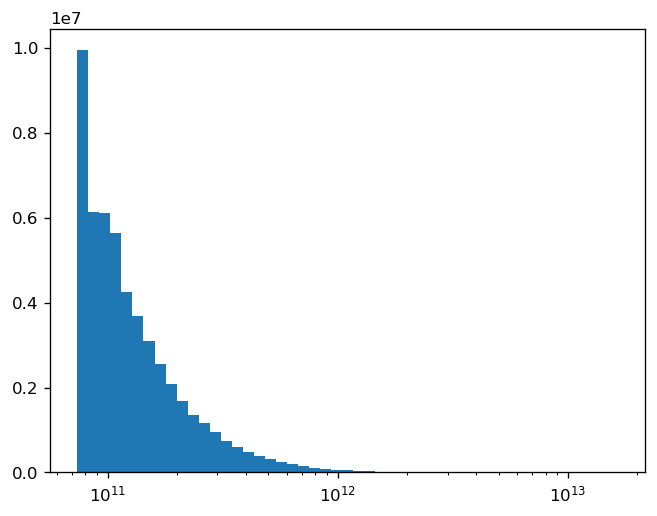

In [6]:
plt.figure(dpi = 120)
plt.hist(N_parts * partMass, bins = np.geomspace(np.min(N_parts*partMass), np.max(N_parts*partMass), 50))
plt.xscale('log')
plt.show()

In [7]:
np.min(N_parts*partMass)/1E10

np.float64(7.3817853215857205)